In [7]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv("D:\\DATA SCIENCE\\DATA ANALYTICS\\Student_Performance MLR.csv")

In [9]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [10]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
#we don't have any missing values in all the columns so, let's continue with the further steps.
#So we have categorical column "Extracurricular Activities" which we have to convert into numbers for understanding for system.

In [12]:
Extra_Curricular_Activities=LabelEncoder()

In [13]:
df['Extra_Curricular_Activities']=Extra_Curricular_Activities.fit_transform(df['Extracurricular Activities'])

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_Curricular_Activities
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [15]:
df_update=df.drop('Extracurricular Activities',axis=1)

In [16]:
df_update.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_Curricular_Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


C:\Users\91846\AppData\Local\Temp\ipykernel_17948\899554412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_update[column])
C:\Users\91846\AppData\Local\Temp\ipykernel_17948\899554412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_update[column])
C:\Users\91846\AppData\Local\Temp\

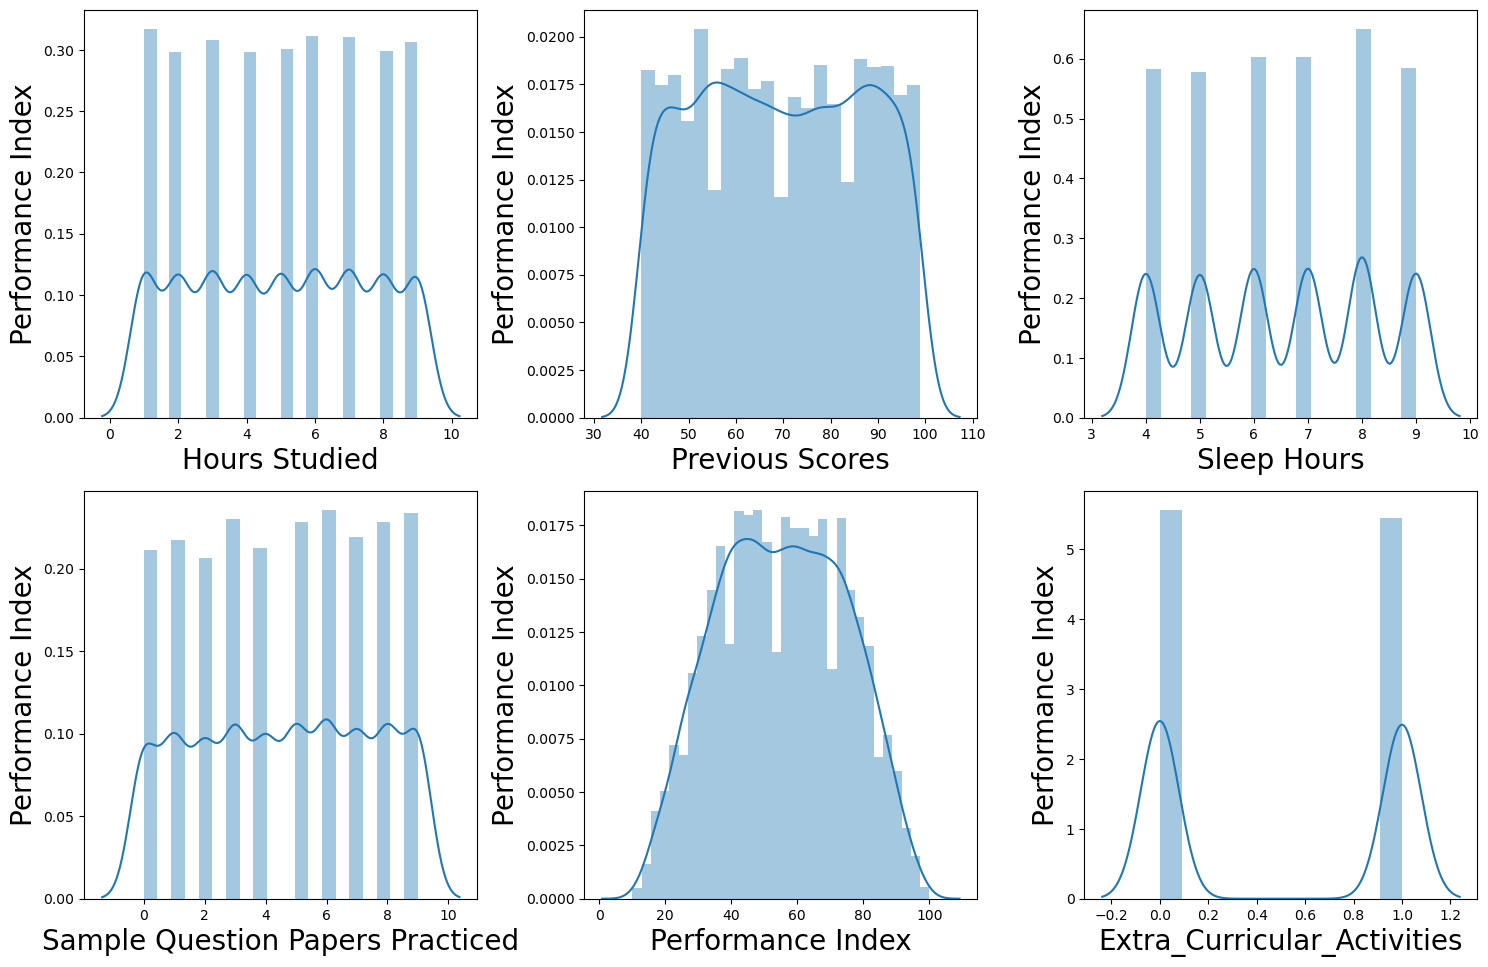

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,14), facecolor='white')
plotnumber = 1

for column in df_update:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_update[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Performance Index',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
# In above distribution there is no skewness occured
#Log transformation: Apply log(x) when the data is right-skewed (long tail on the right).
#Square root transformation: Use √x for mild right-skewness.
#Reciprocal transformation: Use 1/x for severe skewness.

In [19]:
y=df_update['Performance Index']
X=df_update.drop("Performance Index",axis=1)

In [20]:
X.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extra_Curricular_Activities
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0


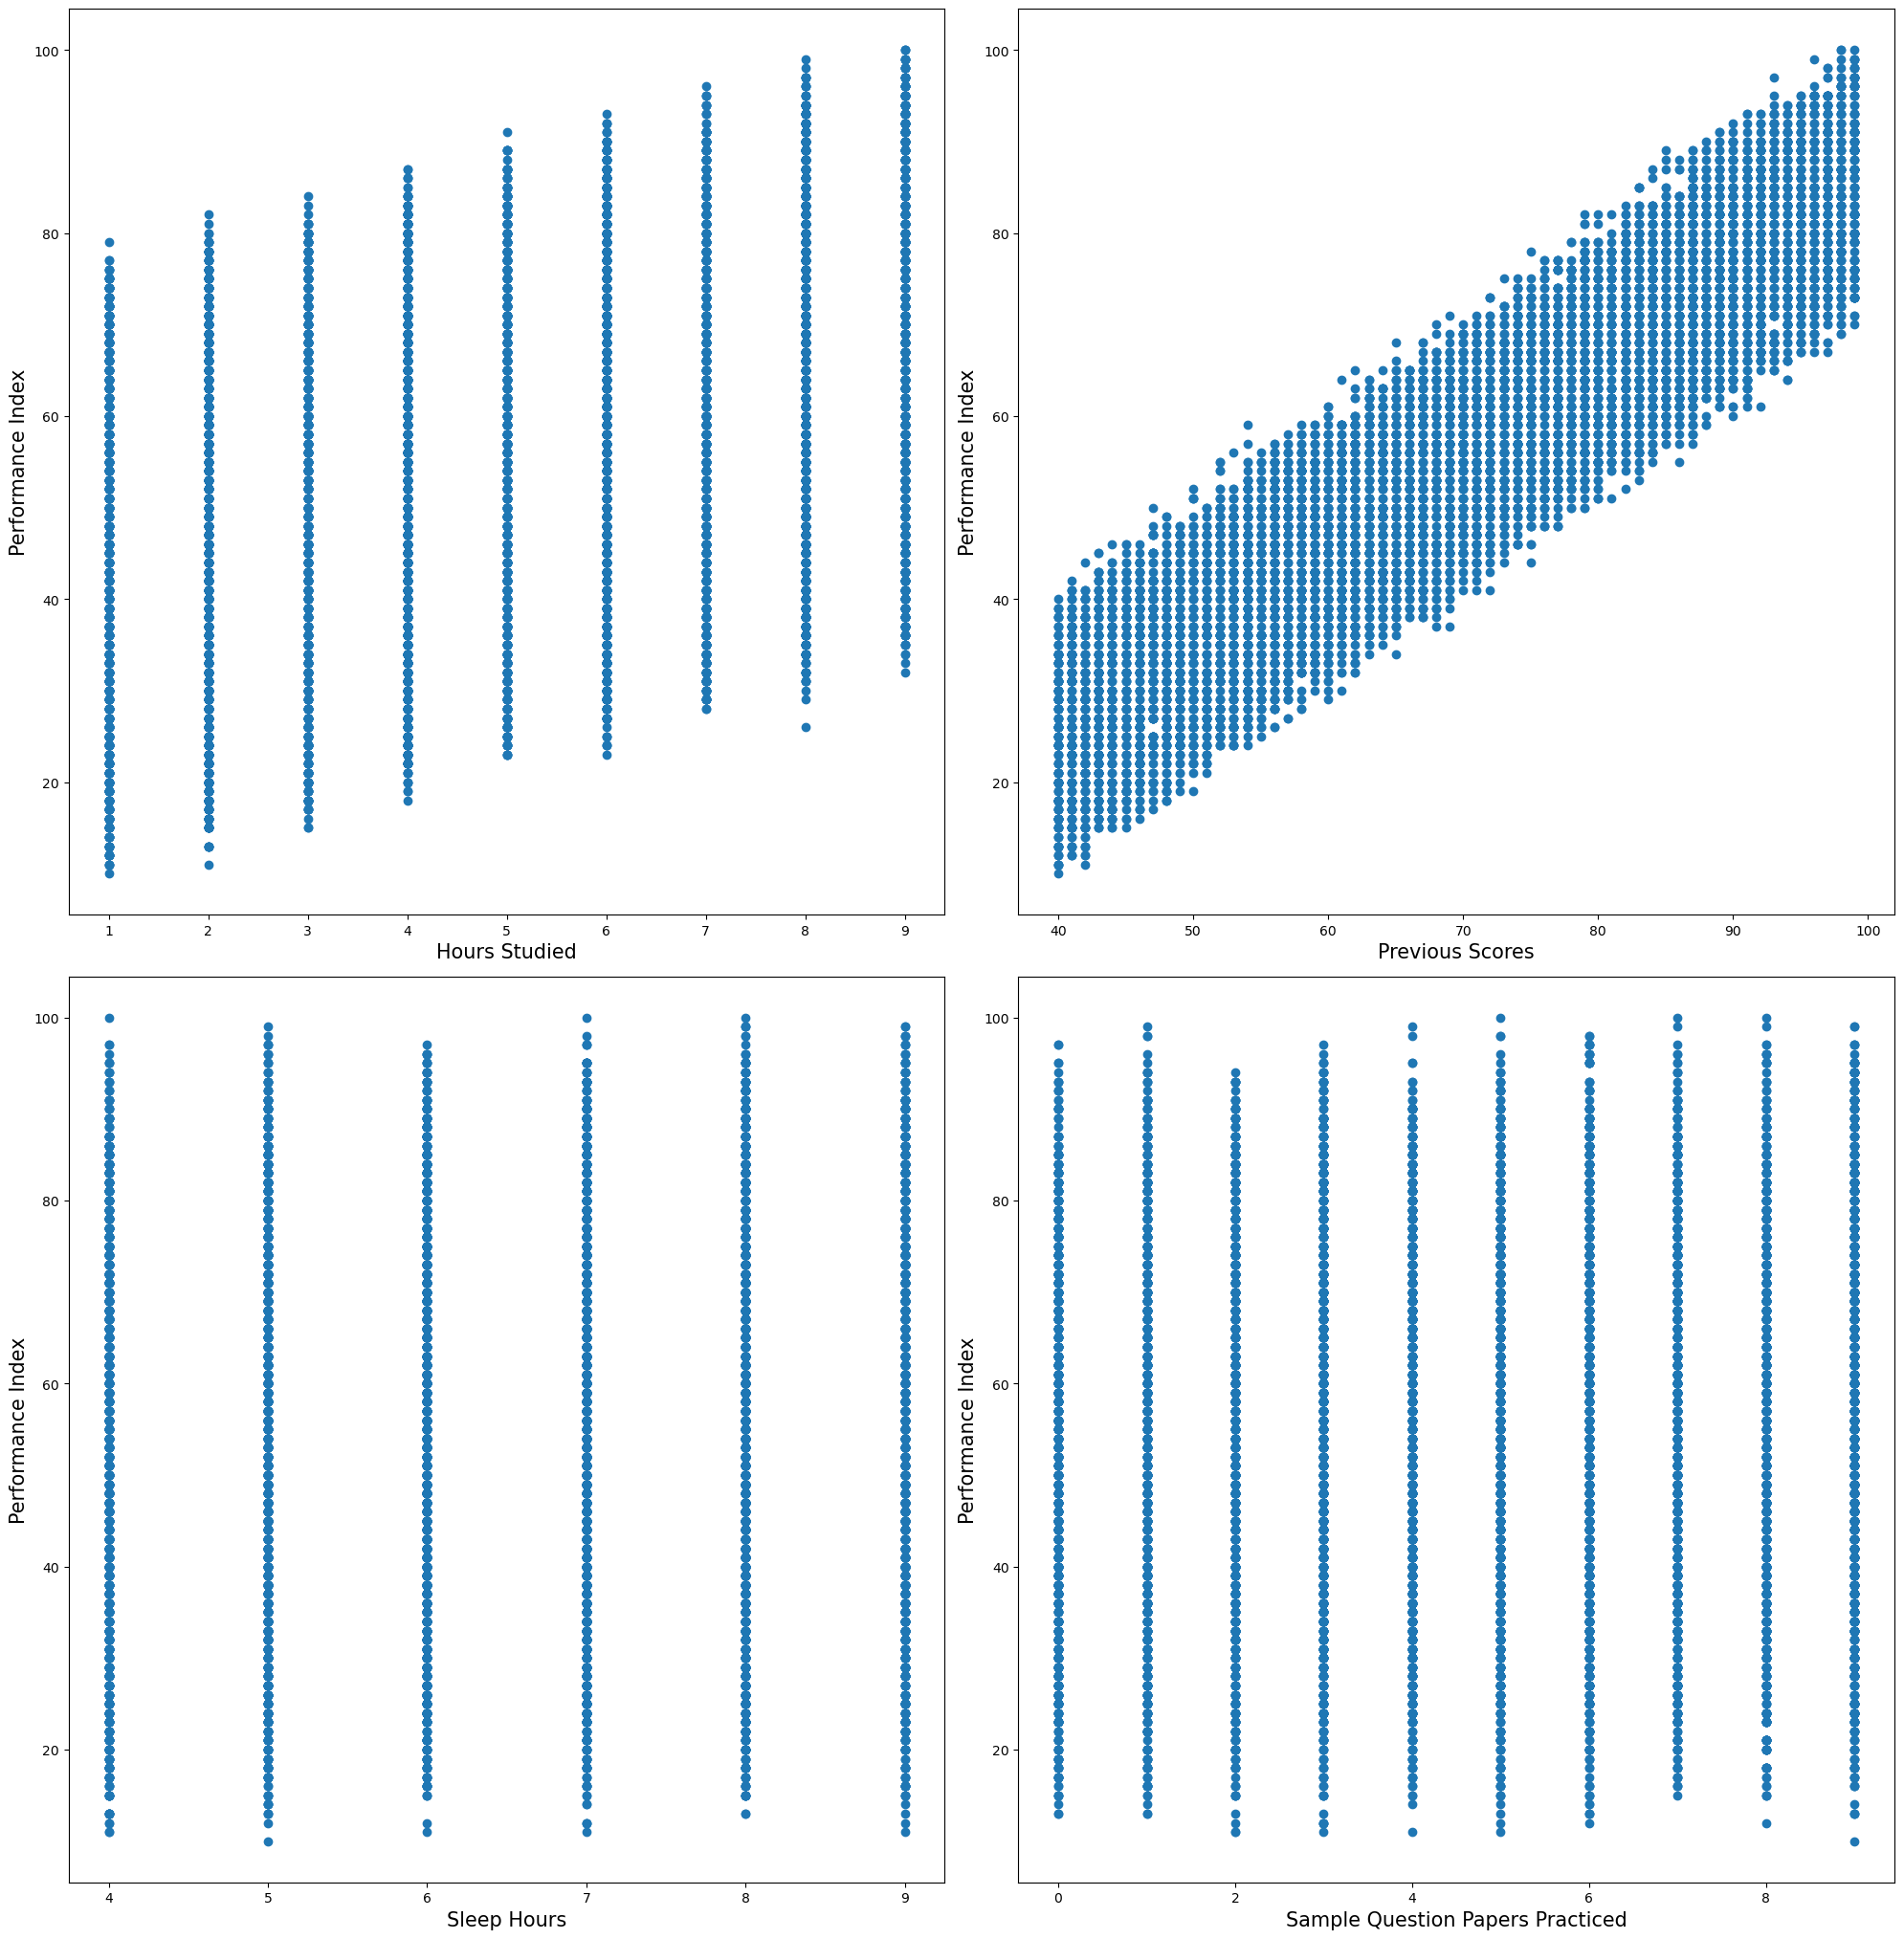

In [21]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=4 :
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Performance Index',fontsize=15)
    plotnumber+=1
plt.tight_layout()
#tight layout adjust the parameters

In [22]:
X.iloc[0]

Hours Studied                        7
Previous Scores                     99
Sleep Hours                          9
Sample Question Papers Practiced     1
Extra_Curricular_Activities          1
Name: 0, dtype: int64

In [23]:
#Using the StandardScaler on your data, it transforms the numbers in a way that makes them more comparable and helps algorithms work better with the standardized data.
#standardizing features by removing the mean and scaling to unit variance. 

In [24]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X_scaler[0]

array([ 0.77518771,  1.70417565,  1.45620461, -1.24975394,  1.01045465])

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaler
#vif is used to find multi-colinearity between input variables.
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [26]:
vif

,VIF,Features
0,1.000478,Hours Studied
1,1.000326,Previous Scores
2,1.000600,Sleep Hours
3,1.000557,Sample Question Papers Practiced
4,1.000802,Extra_Curricular_Activities


In [27]:
#if we have vif>5 then we have multi-collinearity from the above table we don't have that relation so, NO PROBLEM

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,test_size = 0.2)

In [29]:
x_train

array([[ 0.00274218,  0.20494992,  0.27680507,  1.19164856, -0.98965352],
       [-0.76970335, -1.17895075, -1.49229423, -1.59852572,  1.01045465],
       [-1.15592611, -0.08336272,  0.86650484, -0.55221037,  1.01045465],
       ...,
       [ 0.00274218,  1.01222532, -0.3128947 ,  0.84287677,  1.01045465],
       [ 1.54763324, -1.46726339,  0.86650484,  1.54042034,  1.01045465],
       [-1.15592611, -0.42933789, -0.3128947 , -1.24975394, -0.98965352]])

In [30]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
mlr=regression.score(x_train,y_train)
mlr

0.9888686312041339

In [32]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [33]:
adj_r2(x_train,y_train)

0.9888616688768911

In [34]:
regression.score(x_test,y_test)

0.9882681620267323

In [35]:
mlr=adj_r2(x_test,y_test)
mlr

0.9882387441782536

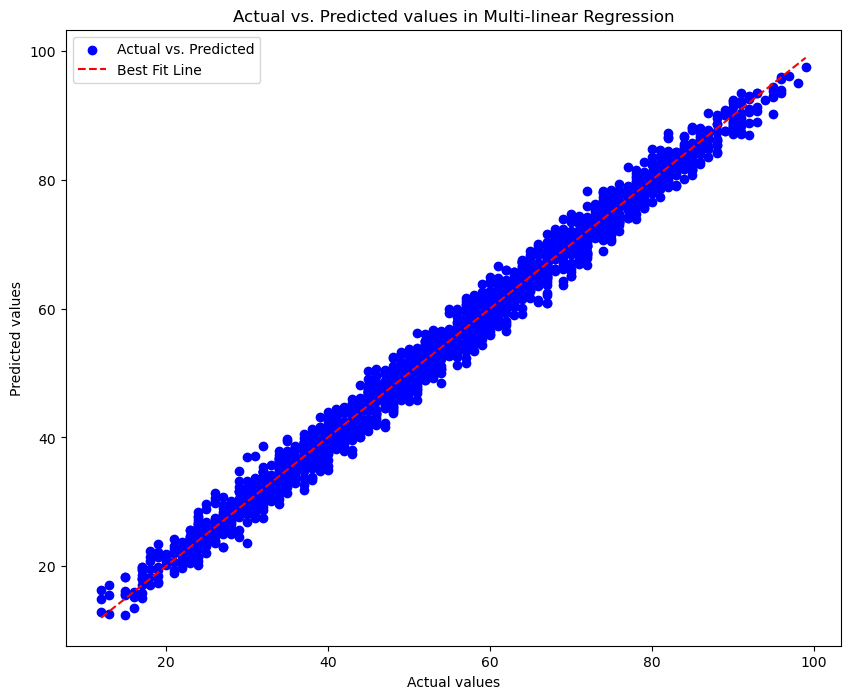

In [36]:
# model is same on the train and test data.
y_pred = regression.predict(x_test)

# Plot the best fit line graph
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line')
plt.title('Actual vs. Predicted values in Multi-linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [37]:
y_test

300     75.0
4206    39.0
9269    72.0
4571    54.0
8811    79.0
        ... 
8066    57.0
5340    61.0
5662    65.0
7412    50.0
6297    24.0
Name: Performance Index, Length: 2000, dtype: float64

In [38]:
y_pred.size

2000

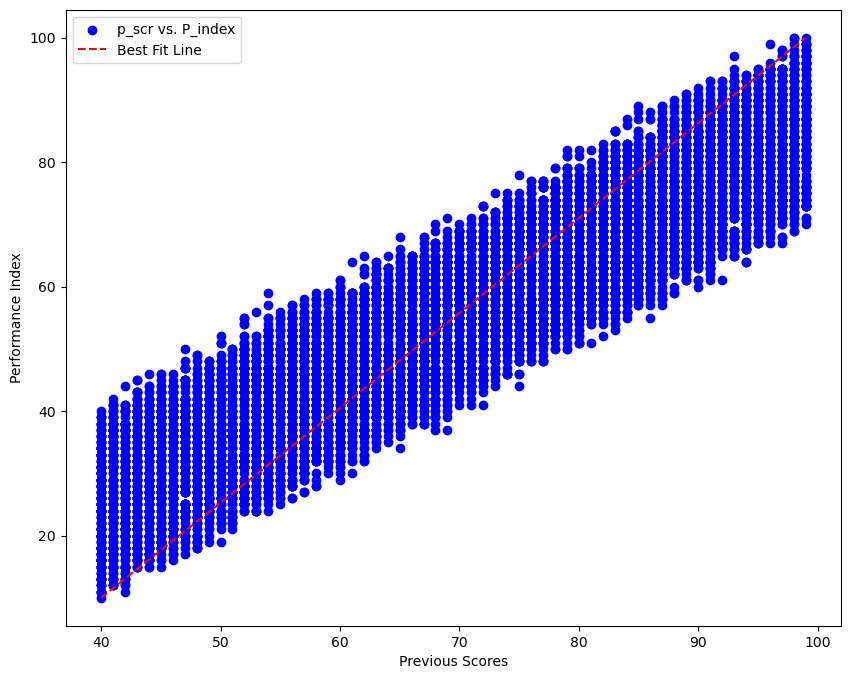

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(df_update['Previous Scores'],df_update['Performance Index'], color='blue', label='p_scr vs. P_index')
plt.plot([df_update['Previous Scores'].min(), df_update['Previous Scores'].max()], [df_update['Performance Index'].min(), df_update['Performance Index'].max()], color='red', linestyle='--', label='Best Fit Line')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

In [40]:
yt=y_test[:100]
yp=y_pred[:100]
print(yt)

300     75.0
4206    39.0
9269    72.0
4571    54.0
8811    79.0
        ... 
3378    59.0
1462    84.0
2886    74.0
8649    42.0
4879    70.0
Name: Performance Index, Length: 100, dtype: float64


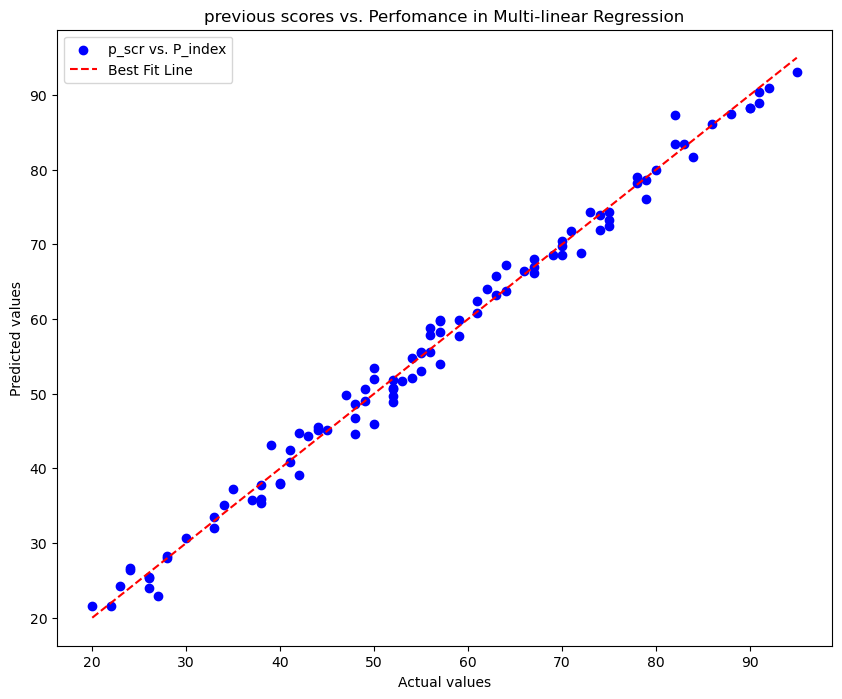

In [41]:
# model is same on the train and test data.
y_pred = regression.predict(x_test)

# Plot the best fit line graph
plt.figure(figsize=(10, 8))
plt.scatter(yt, yp, color='blue', label='p_scr vs. P_index')
plt.plot([yt.min(), yt.max()], [yt.min(), yt.max()], color='red', linestyle='--', label='Best Fit Line')
plt.title('previous scores vs. Perfomance in Multi-linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

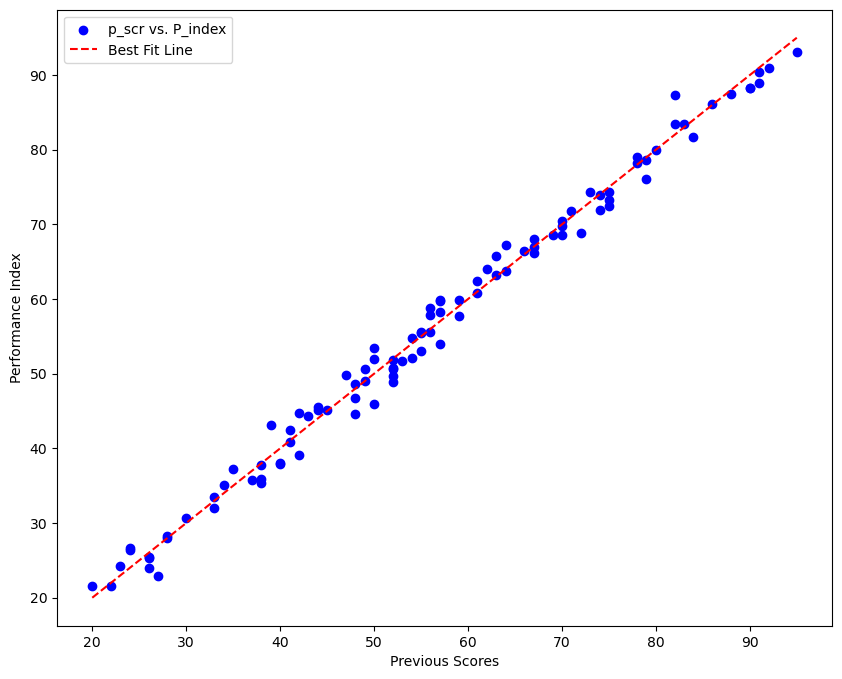

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(yt, yp, color='blue', label='p_scr vs. P_index')
plt.plot([yt.min(), yt.max()], [yt.min(), yt.max()], color='red', linestyle='--', label='Best Fit Line'),plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

In [43]:
import pickle
with open("Student_performance.pickle",'wb') as f:
    pickle.dump(regression,f)

In [44]:
df_update.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extra_Curricular_Activities'],
      dtype='object')

In [45]:
import json
columns={
    'data_columns':[col.lower() for col in df_update.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [46]:
joblib.dump(regression,"regression.joblib")

['regression.joblib']